Import and clean data:

In [29]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('train.csv')

# Extract features:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if string.find(big_string, substring) != -1: # string.find returns -1 if substring not in big_string
                                                    # so string.find is not equal to -1 if substring IS in big_string
            return substring
    # print big_string # only prints the name if string.find is not -1 so if substring is not in big_string
    return np.nan

title_list = ['Mr','Mrs','Dr','Miss','Master','Rev','Major','Don','Mme','Ms','Col','Capt','Countess',
                               'Jonkheer','Mlle']

for name in train_df.Name:
    substrings_in_string(name,title_list)


# Replace all titles with Mrs, Miss, Mr and Master:
train_df['Title'] = train_df['Name'].map(lambda x:substrings_in_string(x,title_list))


def replace_titles(x):
    title = x['Title']
    if title in ['Rev','Major','Don','Col','Capt','Jonkheer']:
        return 'Mr'
    if title in ['Mme','Countess']:
        return 'Mrs'
    if title in ['Mlle','Ms']:
        return 'Miss'
    if title == 'Dr':
        if x['Sex'] == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title


train_df['Title'] = train_df.apply(replace_titles, axis = 1)



# Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

train_df['CabinStr'] = train_df['Cabin'].astype(str)

train_df['Deck'] = train_df['CabinStr'].map(lambda x: substrings_in_string(x, cabin_list))


# Family size:

train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']

# Age*Class:

train_df['Age*Class'] = train_df['Age'] * train_df['Pclass']

# Far per person:

train_df['Fare_Per_Person'] = train_df['Fare'] / (train_df['Family_Size']+1)

# Make catergorical one hot:
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex','Deck',
                                             'Embarked','Title','Survived'],
                           drop_first=False)

In [22]:
train_df.head(5)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,CabinStr,Family_Size,...,Deck_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Survived_0,Survived_1
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,nan,1,...,0,0,0,1,0,0,1,0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C85,1,...,0,1,0,0,0,0,1,0,0,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,nan,0,...,0,0,0,1,0,1,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,C123,1,...,0,0,0,1,0,0,1,0,0,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,nan,0,...,0,0,0,1,0,0,1,0,1,0


Explore continous variables

In [24]:
train_df.describe()

,PassengerId,Age,SibSp,Parch,Fare,Family_Size,Age*Class,Fare_Per_Person,Pclass_1,Pclass_2,...,Deck_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Survived_0,Survived_1
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208,0.904602,61.938151,19.916375,0.242424,0.206510,...,0.001122,0.188552,0.086420,0.722783,0.044893,0.203143,0.747475,0.004489,0.616162,0.383838
std,257.353842,14.526497,1.102743,0.806057,49.693429,1.613459,34.379609,35.841257,0.428790,0.405028,...,0.033501,0.391372,0.281141,0.447876,0.207186,0.402564,0.434705,0.066890,0.486592,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.920000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400,0.000000,38.000000,7.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000,58.000000,8.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,668.500000,38.000000,1.000000,0.000000,31.000000,1.000000,81.000000,23.666667,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,10.000000,222.000000,512.329200,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Explore catergorical variables

In [26]:
train_df.describe(include=['O'])

,Name,Ticket,Cabin,CabinStr
count,891,891,204,891
unique,891,681,147,148
top,"Graham, Mr. George Edward",CA. 2343,C23 C25 C27,nan
freq,1,7,4,687


Look at correlations:

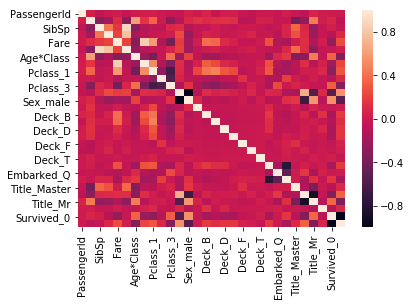

In [42]:
corr = train_df.corr()
sns.heatmap(corr)